[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


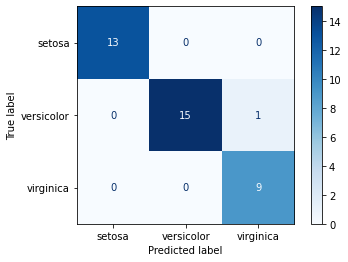

Precision: 0.974
Recall: 0.974


'Precision: Appropriate when minimizing false positives is the focus.\nRecall: Appropriate when minimizing false negatives is the focus. for instance in malware detection recall is very important.\nLike precision and recall, a poor F-Measure score is 0.0 and a best or perfect F-Measure score is 1.0\n'

In [2]:
#Classification Problem Example

# importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing

# loading the iris dataset using sklearn (sklearn.utils.Bunch object)
iris = datasets.load_iris()

# X represents features (or independent variables), y represents label(or depedent variable)
X = iris.data
y = iris.target
class_names = iris.target_names

#X = preprocessing.normalize(X)
  
# Now lets split X (features), y (label) into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# train_test_split (from sklearn) Splits arrays or matrices into random train and test subsets
# X, y: numpy.ndarray is a multidimensional, homogeneous array of fixed-size items.
# random_state controls the shuffling applied to the data before applying the split. 0 does normal random of all data.
# The default split size in sklearn. model_selection. train_test_split are 75% training and 25% testing data split.

# Using the training set, let's train a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_model = DecisionTreeClassifier().fit(X_train, y_train)
# max_depth is the max depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

# Using the test set, we test the trained model by calling the predict function
dtree_predictions = dtree_model.predict(X_test)
  
# We can now evaluate the performance of the trained model via creating a confusion matrix
# confusion matrix describes the performance of a classification model by comparing the predicted labels with actual labels in the test set.
cm = confusion_matrix(y_test, dtree_predictions)
print(cm)

disp = plot_confusion_matrix(dtree_model, X_test, y_test,display_labels=class_names, cmap=plt.cm.Blues)
plt.show()

precision = precision_score(y_test, dtree_predictions, labels=[0,1,2], average='micro') 
print('Precision: %.3f' % precision)
'''
In an imbalanced classification problem with more than two classes, precision is calculated as the sum of true positives across all classes divided by the sum of true positives and false positives across all classes.
Precision = Sum c in C TruePositives_c / Sum c in C (TruePositives_c + FalsePositives_c)
'''

#Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.
# Recall = Sum c in C TruePositives_c / Sum c in C (TruePositives_c + FalseNegatives_c)
recall= recall_score(y_test, dtree_predictions,labels=[0,1,2], average='micro')
print('Recall: %.3f' % recall)


'''Precision: Appropriate when minimizing false positives is the focus.
Recall: Appropriate when minimizing false negatives is the focus. for instance in malware detection recall is very important.
Like precision and recall, a poor F-Measure score is 0.0 and a best or perfect F-Measure score is 1.0
'''

